In [6]:
# pip install dictdiffer
# import dictdiffer 
import random

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set(font_scale=1.5)


import warnings
warnings.filterwarnings('ignore')


import h2o
h2o.init(min_mem_size='15G')


DATA_LOCATION  = "../../data/"
MODELS_LOCATION = "../../models/"


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 12 days !!!
H2O_cluster_name:,H2O_from_python_abhi1_ogwyfe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.88 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


## Models trained on ALL_FEATURES

In [3]:
train = h2o.import_file( DATA_LOCATION + "processed/final.train.tsv")
test = h2o.import_file( DATA_LOCATION + "processed/final.test.tsv")

# Identify predictors and response
train_predictor_cols = train.columns
train_response_col = "Resistance_Status"
train_predictor_cols.remove('SampleID')
train_predictor_cols.remove(train_response_col)
print("train frame - predictor column: ", train_predictor_cols[0], train_predictor_cols[-1])
print("train frame - response column: ", train_response_col)



# Identify predictors and response
test_predictor_cols = test.columns
test_response_col = "Resistance_Status"
test_predictor_cols.remove('SampleID')
test_predictor_cols.remove(test_response_col)
print("test frame - predictor columns: ", test_predictor_cols[0], test_predictor_cols[-1])
print("test frame - response column: ", test_response_col)



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
train frame - predictor column:  NC000962_3.22 NC000962_3.4411327
train frame - response column:  Resistance_Status
test frame - predictor columns:  NC000962_3.22 NC000962_3.4411327
test frame - response column:  Resistance_Status


In [4]:

# For binary classification, response should be a factor
train[train_response_col] = train[train_response_col].asfactor()
test[test_response_col] = test[test_response_col].asfactor()


# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

MAX_GRID_MODELS = 10


x = train_predictor_cols
y = train_response_col




In [13]:
# top_dl= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_dl/DeepLearning_model_python_1604930735703_113")
# top_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_drf/DRF_model_python_1604930735703_145")

top_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_gbm/GBM_model_python_1604923471176_413")
top_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_glm/GLM_model_python_1604923471176_393")
top_nb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_nb/NaiveBayes_model_python_1604923471176_225")

# Can't inspect this on Windows
# top_xgb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_xgb/XGBoost_model_python_1604923471176_641")



[[0.676193954228797, 0.8773507767784138]]


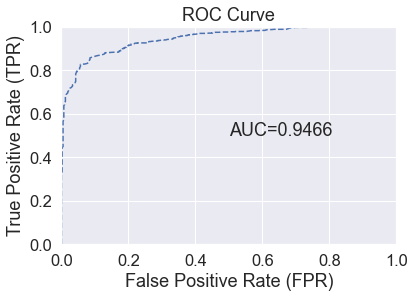

In [39]:
mdl = top_gbm

print(mdl.model_performance(train=True).accuracy())

mdl.model_performance(train=True).plot()



In [97]:
top_dl= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_dl/DeepLearning_model_python_1604930735703_113")
top_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_drf/DRF_model_python_1604930735703_145")
top_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_gbm/GBM_model_python_1604923471176_413")
top_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_glm/GLM_model_python_1604923471176_393")
top_nb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_nb/NaiveBayes_model_python_1604923471176_225")
top_xgb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_xgb/XGBoost_model_python_1604923471176_641")



top_ensemble_ALL_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost")


top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost")


top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost")



In [98]:
models_trained_on_all_features = [


top_dl,
top_drf,
top_gbm,
top_glm,
top_nb,
top_xgb, # index 5

top_ensemble_ALL_MODELS_METALEARNER_auto,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning,
top_ensemble_ALL_MODELS_METALEARNER_drf, # index 8
top_ensemble_ALL_MODELS_METALEARNER_gbm,
top_ensemble_ALL_MODELS_METALEARNER_glm,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes,
top_ensemble_ALL_MODELS_METALEARNER_xgboost, # index 12

top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto, 
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf, # index 15
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost, # index 19

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf, # index 22
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes, 
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost, # index 26



]

models_trained_on_all_features_list = []
models_trained_on_all_features_dict = {}



for a_model in models_trained_on_all_features:
    test_performance = a_model.model_performance(test)
    train_performance = a_model.model_performance(train)

    metrics_dict = {
        'test': {
            'auc': test_performance.auc(),
            'confusion_matrix': test_performance.confusion_matrix(),
            'accuracy': test_performance.accuracy(),
            'sensitivity': test_performance.sensitivity(),
            'specificity': test_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': test_performance.precision(),
            'recall': test_performance.recall(),
            'fallout': test_performance.fallout(),
            'missrate': test_performance.missrate()
            # 'r2':
        },
        'train': {
            'auc': train_performance.auc(),
            'confusion_matrix': train_performance.confusion_matrix(),
            'accuracy': train_performance.accuracy(),
            'sensitivity': train_performance.sensitivity(),
            'specificity': train_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': train_performance.precision(),
            'recall': train_performance.recall(),
            'fallout': train_performance.fallout(),
            'missrate': train_performance.missrate()
            # 'r2':
        }
    }

    models_trained_on_all_features_dict[a_model.model_id] = metrics_dict
    models_trained_on_all_features_list.append([a_model.model_id, metrics_dict])

    print('Model ID : ', a_model.model_id)
    print('AUC on test data: ', test_performance.auc(), "\n\n============================")


Model ID :  DeepLearning_model_python_1604930735703_113
AUC on test data:  0.6284078121029513 

Model ID :  DRF_model_python_1604930735703_145
AUC on test data:  0.5949649689621375 

Model ID :  GBM_model_python_1604923471176_413
AUC on test data:  0.684212436925981 

Model ID :  GLM_model_python_1604923471176_393
AUC on test data:  0.7338639416270374 

Model ID :  NaiveBayes_model_python_1604923471176_225
AUC on test data:  0.6308581696736486 

Model ID :  XGBoost_model_python_1604923471176_641
AUC on test data:  0.7161487639307366 

Model ID :  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_auto
AUC on test data:  0.7297981631393617 

Model ID :  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning
AUC on test data:  0.7413239191200494 

Could not find exact threshold 0.0; using closest threshold found 0.0.
Model ID :  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf
AUC on test data:  0.7045322539659491 

Model ID :  stacked_ensemble_ALL_FEATURES_ALL_MODEL

In [64]:
    models_trained_on_all_features_list[0][1]['test']


Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.3241724178102582e-07: 


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


{'auc': 0.6284078121029513,
 'confusion_matrix': ,
 'accuracy': [[0.0026690035022746412, 0.6766467065868264]],
 'sensitivity': [[2.3241724178102582e-07, 1.0]],
 'specificity': [[0.999999928606182, 0.9631901840490797]],
 'run_time': 229935,
 'precision': [[0.9999986583195819, 0.8653846153846154]],
 'recall': [[2.3241724178102582e-07, 1.0]],
 'fallout': [[2.3241724178102582e-07, 1.0]],
 'missrate': [[0.999999928606182, 0.9142011834319527]]}

In [116]:
for a_mdl in models_trained_on_all_features_list[20:27]:
    
    print(a_mdl[0])
    print(a_mdl[1]['test']['accuracy'])
    print(a_mdl[1]['test']['auc'])
    print(a_mdl[1]['test']['run_time'])

    print("-----------------------------")

stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto
[[0.5811328619904352, 0.6806387225548902]]
0.7199150542708824
35781
-----------------------------
stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
[[0.07271799665219454, 0.6906187624750499]]
0.7169201727955857
40313
-----------------------------
stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
[[0.3346666657924652, 0.6826347305389222]]
0.7096507786691836
36691
-----------------------------
stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
[[0.39439856152079966, 0.6866267465069861]]
0.7027171742839511
46266
-----------------------------
stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
[[0.22400608495221697, 0.6926147704590818]]
0.7168384942098959
38856
-----------------------------
stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
[[0.5068720131069817, 0.6766467065868264]]
0.7033161505790104
37725
--

In [65]:
    models_trained_on_all_features_list[0][1]['train']


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9776408218392322: 


,,0,1,Error,Rate
0,0,416.0,7.0,0.0165,(7.0/423.0)
1,1,14.0,786.0,0.0175,(14.0/800.0)
2,Total,430.0,793.0,0.0172,(21.0/1223.0)


{'auc': 0.9977408392434989,
 'confusion_matrix': ,
 'accuracy': [[0.9776408218392322, 0.9828291087489779]],
 'sensitivity': [[0.4323963518609065, 1.0]],
 'specificity': [[0.9999999216710116, 1.0]],
 'run_time': 229935,
 'precision': [[0.9999999216710116, 1.0]],
 'recall': [[0.4323963518609065, 1.0]],
 'fallout': [[2.4274324714855924e-08, 1.0]],
 'missrate': [[0.9999999216710116, 0.525]]}

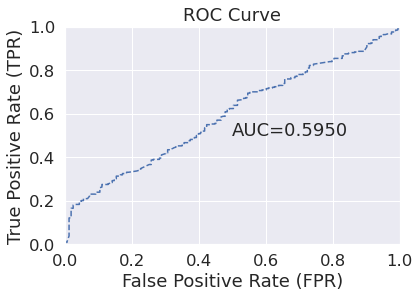

In [18]:
top_drf.model_performance(test).plot()

In [37]:
top_nb.model_performance().precision()

[[0.9999831492105087, 0.89375]]

In [39]:
top_nb.model_performance(test).r2()

-0.529004196852279

In [59]:
top_drf.model_performance().confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6458369548724031: 


,,0,1,Error,Rate
0,0,558.0,250.0,0.3094,(250.0/808.0)
1,1,133.0,667.0,0.1663,(133.0/800.0)
2,Total,691.0,917.0,0.2382,(383.0/1608.0)


''

In [32]:
top_drf.model_performance(test).confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4043096005966431: 


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


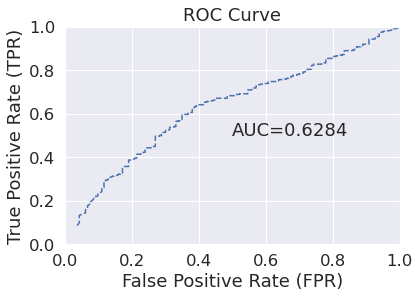

In [19]:
top_dl.model_performance(test).plot()

In [121]:
top_ensemble_CHECKPOINT_MODELS_MTLNR_auto.metalearner().params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'metalearner_AUTO_StackedEnsemble_model_python_1604937120558_594',
   'type': 'Key<Model>',
   'URL': '/3/Models/metalearner_AUTO_StackedEnsemble_model_python_1604937120558_594'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 0},
 'seed': {'default': -1, 'actual': -629306770440964306},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'AUTO'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    's

In [11]:
print('AUC on test data: ', top_nb.model_performance(test).auc(), "\n\n============================")
top_nb

AUC on test data:  0.6308581696736486 

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604923471176_225


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.27036993349759847
RMSE: 0.5199710890978444
LogLoss: 4.3907733111276475
Mean Per-Class Error: 0.28826979905437355
AUC: 0.751100768321513
AUCPR: 0.8346945181496381
Gini: 0.5022015366430259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.4338228925939728e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.68 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.33561203828422775
RMSE: 0.5793203244183892
LogLoss: 4.38842128604827
Mean Per-Class Error: 0.3850328529422442
AUC: 0.6308581696736486
AUCPR: 0.7700108089513915
Gini: 0.2617163393472972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 9.018296132152746e-17: 

Maximum Metrics: Maximum

,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.345896,0.654104


,,0,1,Error,Rate
0,0,241.0,182.0,0.4303,(182.0/423.0)
1,1,152.0,648.0,0.19,(152.0/800.0)
2,Total,393.0,830.0,0.2731,(334.0/1223.0)


,metric,threshold,value,idx
0,max f1,2.433823e-05,0.795092,397.0
1,max f2,6.252900e-08,0.904364,399.0
2,max f0point5,9.490915e-02,0.799843,348.0
3,max accuracy,9.490915e-02,0.728536,348.0
4,max precision,9.999831e-01,0.893750,1.0
5,max recall,6.252900e-08,1.000000,399.0
6,max specificity,9.999997e-01,0.919622,0.0
7,max absolute_mcc,9.490915e-02,0.414922,348.0
8,max min_per_class_accuracy,7.526658e-01,0.699764,277.0
9,max mean_per_class_accuracy,9.490915e-02,0.711730,348.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.102208,1.000000e+00,1.467600,1.467600,0.960000,1.000000e+00,0.960000,1.000000,0.15000,0.15000,46.760000,46.760000
1,,2,0.150450,1.000000e+00,1.399195,1.445666,0.915254,1.000000e+00,0.945652,1.000000,0.06750,0.21750,39.919492,44.566576
2,,3,0.200327,9.999999e-01,1.278135,1.403954,0.836066,1.000000e+00,0.918367,1.000000,0.06375,0.28125,27.813525,40.395408
3,,4,0.300082,9.996645e-01,1.240543,1.349632,0.811475,9.999410e-01,0.882834,0.999980,0.12375,0.40500,24.054303,34.963215
4,,5,0.399836,9.916471e-01,1.190420,1.309911,0.778689,9.971887e-01,0.856851,0.999284,0.11875,0.52375,19.042008,30.991053
5,,6,0.500409,9.438170e-01,1.193171,1.286448,0.780488,9.761841e-01,0.841503,0.994641,0.12000,0.64375,19.317073,28.644812
6,,7,0.600164,2.706567e-01,0.989928,1.237163,0.647541,7.455082e-01,0.809264,0.953232,0.09875,0.74250,-1.007172,23.716281
7,,8,0.699918,1.046298e-06,0.789436,1.173351,0.516393,4.702651e-02,0.767523,0.824077,0.07875,0.82125,-21.056352,17.335134
8,,9,0.799673,2.625813e-12,0.864621,1.134839,0.565574,1.003969e-07,0.742331,0.721278,0.08625,0.90750,-13.537910,13.483896
9,,10,0.899428,6.179552e-17,0.538822,1.068735,0.352459,1.329336e-13,0.699091,0.641282,0.05375,0.96125,-46.117828,6.873523


,,0,1,Error,Rate
0,0,4.0,159.0,0.9755,(159.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,6.0,495.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,9.018296e-17,0.806723,351.0
1,max f2,1.103935e-27,0.912035,356.0
2,max f0point5,5.856787e-04,0.737212,270.0
3,max accuracy,4.350758e-16,0.678643,349.0
4,max precision,9.999998e-01,0.846715,4.0
5,max recall,1.103935e-27,1.000000,356.0
6,max specificity,1.000000e+00,0.877301,0.0
7,max absolute_mcc,9.999947e-01,0.226567,30.0
8,max min_per_class_accuracy,9.972941e-01,0.588957,123.0
9,max mean_per_class_accuracy,9.999947e-01,0.614967,30.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.035928,1.000000e+00,0.823471,0.823471,0.555556,1.000000e+00,0.555556,1.000000,0.029586,0.029586,-17.652860,-17.652860
1,,2,0.041916,1.000000e+00,0.988166,0.846999,0.666667,1.000000e+00,0.571429,1.000000,0.005917,0.035503,-1.183432,-15.300085
2,,3,0.051896,1.000000e+00,1.482249,0.969162,1.000000,1.000000e+00,0.653846,1.000000,0.014793,0.050296,48.224852,-3.083751
3,,4,0.101796,1.000000e+00,1.304379,1.133484,0.880000,1.000000e+00,0.764706,1.000000,0.065089,0.115385,30.437870,13.348416
4,,5,0.151697,1.000000e+00,1.422959,1.228706,0.960000,1.000000e+00,0.828947,1.000000,0.071006,0.186391,42.295858,22.870601
5,,6,0.201597,1.000000e+00,1.126509,1.203410,0.760000,1.000000e+00,0.811881,1.000000,0.056213,0.242604,12.650888,20.340969
6,,7,0.301397,9.999991e-01,1.245089,1.217211,0.840000,9.999998e-01,0.821192,1.000000,0.124260,0.366864,24.508876,21.721071
7,,8,0.401198,9.999738e-01,0.978284,1.157776,0.660000,9.999905e-01,0.781095,0.999998,0.097633,0.464497,-2.171598,15.777621
8,,9,0.500998,9.995045e-01,0.948639,1.116115,0.640000,9.998360e-01,0.752988,0.999965,0.094675,0.559172,-5.136095,11.611542
9,,10,0.600798,9.756694e-01,0.978284,1.093220,0.660000,9.911600e-01,0.737542,0.998503,0.097633,0.656805,-2.171598,9.321984


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,3.107947e-10,0.790905,399.0
1,max f2,3.107947e-10,0.904364,399.0
2,max f0point5,6.877151e-04,0.755682,274.0
3,max accuracy,2.923637e-08,0.680294,398.0
4,max precision,1.000000e+00,0.841808,0.0
5,max recall,3.107947e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.867612,0.0
7,max absolute_mcc,6.877151e-04,0.301672,274.0
8,max min_per_class_accuracy,1.544699e-03,0.652482,263.0
9,max mean_per_class_accuracy,6.877151e-04,0.657559,274.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.119379,1.000000e+00,1.413570,1.413570,0.924658,1.000000e+00,0.924658,1.000000,0.16875,0.16875,41.357021,41.357021
1,,2,0.152903,1.000000e+00,1.193171,1.365247,0.780488,1.000000e+00,0.893048,1.000000,0.04000,0.20875,19.317073,36.524733
2,,3,0.200327,1.000000e+00,1.186099,1.322837,0.775862,1.000000e+00,0.865306,1.000000,0.05625,0.26500,18.609914,32.283673
3,,4,0.300082,9.999999e-01,1.202951,1.282984,0.786885,1.000000e+00,0.839237,1.000000,0.12000,0.38500,20.295082,28.298365
4,,5,0.399836,9.993061e-01,1.090174,1.234880,0.713115,9.999141e-01,0.807771,0.999979,0.10875,0.49375,9.017418,23.487986
5,,6,0.500409,1.397471e-01,1.081311,1.204016,0.707317,8.368773e-01,0.787582,0.967198,0.10875,0.60250,8.131098,20.401552
6,,7,0.600164,1.076027e-04,1.002459,1.170514,0.655738,1.313929e-02,0.765668,0.808622,0.10000,0.70250,0.245902,17.051431
7,,8,0.699918,4.439823e-09,0.889682,1.130489,0.581967,1.451966e-05,0.739486,0.693376,0.08875,0.79125,-11.031762,13.048919
8,,9,0.799673,3.509020e-12,0.877152,1.098887,0.573770,4.980517e-10,0.718814,0.606882,0.08750,0.87875,-12.284836,9.888676
9,,10,0.899428,1.257580e-20,0.839559,1.070125,0.549180,3.575193e-13,0.700000,0.539573,0.08375,0.96250,-16.044057,7.012500


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.73104733,0.019846965,0.7148594,0.7380952,0.748954,0.7053942,0.74793386
1,auc,0.7422957,0.045274667,0.76082253,0.76421857,0.7336871,0.66809005,0.7846601
2,aucpr,0.8217056,0.034272775,0.8420239,0.8386451,0.82557905,0.7615305,0.84074944
3,err,0.26895267,0.019846965,0.28514057,0.26190478,0.25104603,0.29460582,0.2520661
4,err_count,65.8,5.263079,71.0,66.0,60.0,71.0,61.0
5,f0point5,0.7643697,0.017081713,0.7551826,0.7643979,0.7801047,0.74091333,0.78125
6,f1,0.81966215,0.007892913,0.8116711,0.8156425,0.8324022,0.81748074,0.82111436
7,f2,0.8841447,0.018203774,0.8772936,0.8742515,0.89221555,0.91169727,0.8652658
8,lift_top_group,1.4557146,0.10668536,1.3676137,1.5849056,1.5031446,1.3251196,1.4977896
9,logloss,6.9117966,3.3499985,4.768356,6.8185945,12.62863,6.051729,4.2916746


Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604923471176_225


Model Summary: 




,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.345896,0.654104


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.27036993349759847
RMSE: 0.5199710890978444
LogLoss: 4.3907733111276475
Mean Per-Class Error: 0.28826979905437355
AUC: 0.751100768321513
AUCPR: 0.8346945181496381
Gini: 0.5022015366430259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.4338228925939728e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.68 %


,,0,1,Error,Rate
0,0,241.0,182.0,0.4303,(182.0/423.0)
1,1,152.0,648.0,0.19,(152.0/800.0)
2,Total,393.0,830.0,0.2731,(334.0/1223.0)


,metric,threshold,value,idx
0,max f1,2.433823e-05,0.795092,397.0
1,max f2,6.252900e-08,0.904364,399.0
2,max f0point5,9.490915e-02,0.799843,348.0
3,max accuracy,9.490915e-02,0.728536,348.0
4,max precision,9.999831e-01,0.893750,1.0
5,max recall,6.252900e-08,1.000000,399.0
6,max specificity,9.999997e-01,0.919622,0.0
7,max absolute_mcc,9.490915e-02,0.414922,348.0
8,max min_per_class_accuracy,7.526658e-01,0.699764,277.0
9,max mean_per_class_accuracy,9.490915e-02,0.711730,348.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.102208,1.000000e+00,1.467600,1.467600,0.960000,1.000000e+00,0.960000,1.000000,0.15000,0.15000,46.760000,46.760000
1,,2,0.150450,1.000000e+00,1.399195,1.445666,0.915254,1.000000e+00,0.945652,1.000000,0.06750,0.21750,39.919492,44.566576
2,,3,0.200327,9.999999e-01,1.278135,1.403954,0.836066,1.000000e+00,0.918367,1.000000,0.06375,0.28125,27.813525,40.395408
3,,4,0.300082,9.996645e-01,1.240543,1.349632,0.811475,9.999410e-01,0.882834,0.999980,0.12375,0.40500,24.054303,34.963215
4,,5,0.399836,9.916471e-01,1.190420,1.309911,0.778689,9.971887e-01,0.856851,0.999284,0.11875,0.52375,19.042008,30.991053
5,,6,0.500409,9.438170e-01,1.193171,1.286448,0.780488,9.761841e-01,0.841503,0.994641,0.12000,0.64375,19.317073,28.644812
6,,7,0.600164,2.706567e-01,0.989928,1.237163,0.647541,7.455082e-01,0.809264,0.953232,0.09875,0.74250,-1.007172,23.716281
7,,8,0.699918,1.046298e-06,0.789436,1.173351,0.516393,4.702651e-02,0.767523,0.824077,0.07875,0.82125,-21.056352,17.335134
8,,9,0.799673,2.625813e-12,0.864621,1.134839,0.565574,1.003969e-07,0.742331,0.721278,0.08625,0.90750,-13.537910,13.483896
9,,10,0.899428,6.179552e-17,0.538822,1.068735,0.352459,1.329336e-13,0.699091,0.641282,0.05375,0.96125,-46.117828,6.873523




ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.33561203828422775
RMSE: 0.5793203244183892
LogLoss: 4.38842128604827
Mean Per-Class Error: 0.3850328529422442
AUC: 0.6308581696736486
AUCPR: 0.7700108089513915
Gini: 0.2617163393472972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 9.018296132152746e-17: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 72.82 %


,,0,1,Error,Rate
0,0,4.0,159.0,0.9755,(159.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,6.0,495.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,9.018296e-17,0.806723,351.0
1,max f2,1.103935e-27,0.912035,356.0
2,max f0point5,5.856787e-04,0.737212,270.0
3,max accuracy,4.350758e-16,0.678643,349.0
4,max precision,9.999998e-01,0.846715,4.0
5,max recall,1.103935e-27,1.000000,356.0
6,max specificity,1.000000e+00,0.877301,0.0
7,max absolute_mcc,9.999947e-01,0.226567,30.0
8,max min_per_class_accuracy,9.972941e-01,0.588957,123.0
9,max mean_per_class_accuracy,9.999947e-01,0.614967,30.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.035928,1.000000e+00,0.823471,0.823471,0.555556,1.000000e+00,0.555556,1.000000,0.029586,0.029586,-17.652860,-17.652860
1,,2,0.041916,1.000000e+00,0.988166,0.846999,0.666667,1.000000e+00,0.571429,1.000000,0.005917,0.035503,-1.183432,-15.300085
2,,3,0.051896,1.000000e+00,1.482249,0.969162,1.000000,1.000000e+00,0.653846,1.000000,0.014793,0.050296,48.224852,-3.083751
3,,4,0.101796,1.000000e+00,1.304379,1.133484,0.880000,1.000000e+00,0.764706,1.000000,0.065089,0.115385,30.437870,13.348416
4,,5,0.151697,1.000000e+00,1.422959,1.228706,0.960000,1.000000e+00,0.828947,1.000000,0.071006,0.186391,42.295858,22.870601
5,,6,0.201597,1.000000e+00,1.126509,1.203410,0.760000,1.000000e+00,0.811881,1.000000,0.056213,0.242604,12.650888,20.340969
6,,7,0.301397,9.999991e-01,1.245089,1.217211,0.840000,9.999998e-01,0.821192,1.000000,0.124260,0.366864,24.508876,21.721071
7,,8,0.401198,9.999738e-01,0.978284,1.157776,0.660000,9.999905e-01,0.781095,0.999998,0.097633,0.464497,-2.171598,15.777621
8,,9,0.500998,9.995045e-01,0.948639,1.116115,0.640000,9.998360e-01,0.752988,0.999965,0.094675,0.559172,-5.136095,11.611542
9,,10,0.600798,9.756694e-01,0.978284,1.093220,0.660000,9.911600e-01,0.737542,0.998503,0.097633,0.656805,-2.171598,9.321984




ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.35928627640629757
RMSE: 0.5994049352535376
LogLoss: 6.885446402616566
Mean Per-Class Error: 0.3424408983451537
AUC: 0.6892390661938534
AUCPR: 0.7895239621957413
Gini: 0.3784781323877069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.1079474322197317e-10: 

Maximum Metrics: Maximum metrics at their respective thresholds


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,3.107947e-10,0.790905,399.0
1,max f2,3.107947e-10,0.904364,399.0
2,max f0point5,6.877151e-04,0.755682,274.0
3,max accuracy,2.923637e-08,0.680294,398.0
4,max precision,1.000000e+00,0.841808,0.0
5,max recall,3.107947e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.867612,0.0
7,max absolute_mcc,6.877151e-04,0.301672,274.0
8,max min_per_class_accuracy,1.544699e-03,0.652482,263.0
9,max mean_per_class_accuracy,6.877151e-04,0.657559,274.0



Gains/Lift Table: Avg response rate: 65.41 %, avg score: 48.53 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()



,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.119379,1.000000e+00,1.413570,1.413570,0.924658,1.000000e+00,0.924658,1.000000,0.16875,0.16875,41.357021,41.357021
1,,2,0.152903,1.000000e+00,1.193171,1.365247,0.780488,1.000000e+00,0.893048,1.000000,0.04000,0.20875,19.317073,36.524733
2,,3,0.200327,1.000000e+00,1.186099,1.322837,0.775862,1.000000e+00,0.865306,1.000000,0.05625,0.26500,18.609914,32.283673
3,,4,0.300082,9.999999e-01,1.202951,1.282984,0.786885,1.000000e+00,0.839237,1.000000,0.12000,0.38500,20.295082,28.298365
4,,5,0.399836,9.993061e-01,1.090174,1.234880,0.713115,9.999141e-01,0.807771,0.999979,0.10875,0.49375,9.017418,23.487986
5,,6,0.500409,1.397471e-01,1.081311,1.204016,0.707317,8.368773e-01,0.787582,0.967198,0.10875,0.60250,8.131098,20.401552
6,,7,0.600164,1.076027e-04,1.002459,1.170514,0.655738,1.313929e-02,0.765668,0.808622,0.10000,0.70250,0.245902,17.051431
7,,8,0.699918,4.439823e-09,0.889682,1.130489,0.581967,1.451966e-05,0.739486,0.693376,0.08875,0.79125,-11.031762,13.048919
8,,9,0.799673,3.509020e-12,0.877152,1.098887,0.573770,4.980517e-10,0.718814,0.606882,0.08750,0.87875,-12.284836,9.888676
9,,10,0.899428,1.257580e-20,0.839559,1.070125,0.549180,3.575193e-13,0.700000,0.539573,0.08375,0.96250,-16.044057,7.012500


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.73104733,0.019846965,0.7148594,0.7380952,0.748954,0.7053942,0.74793386
1,auc,0.7422957,0.045274667,0.76082253,0.76421857,0.7336871,0.66809005,0.7846601
2,aucpr,0.8217056,0.034272775,0.8420239,0.8386451,0.82557905,0.7615305,0.84074944
3,err,0.26895267,0.019846965,0.28514057,0.26190478,0.25104603,0.29460582,0.2520661
4,err_count,65.8,5.263079,71.0,66.0,60.0,71.0,61.0
5,f0point5,0.7643697,0.017081713,0.7551826,0.7643979,0.7801047,0.74091333,0.78125
6,f1,0.81966215,0.007892913,0.8116711,0.8156425,0.8324022,0.81748074,0.82111436
7,f2,0.8841447,0.018203774,0.8772936,0.8742515,0.89221555,0.91169727,0.8652658
8,lift_top_group,1.4557146,0.10668536,1.3676137,1.5849056,1.5031446,1.3251196,1.4977896
9,logloss,6.9117966,3.3499985,4.768356,6.8185945,12.62863,6.051729,4.2916746


In [27]:
top_nb.save_model_details()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/dissertationrgvm/code/Users/UPLASHA2/LJMU_Masters_Dissertation/src/notebooks/FINAL/NaiveBayes_model_python_1604923471176_225.json'

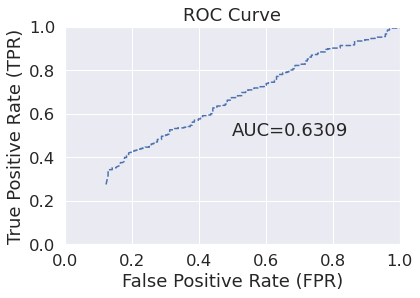

In [24]:
top_nb.model_performance(test).plot()

In [60]:
top_nb.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'NaiveBayes_model_python_1604923471176_225',
   'type': 'Key<Model>',
   'URL': '/3/Models/NaiveBayes_model_python_1604923471176_225'}},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1234},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistanc

In [33]:
top_nb.model_performance(xval=True)


ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.35928627640629757
RMSE: 0.5994049352535376
LogLoss: 6.885446402616566
Mean Per-Class Error: 0.3424408983451537
AUC: 0.6892390661938534
AUCPR: 0.7895239621957413
Gini: 0.3784781323877069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.1079474322197317e-10: 


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)



Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 48.53 %



,metric,threshold,value,idx
0,max f1,3.107947e-10,0.790905,399.0
1,max f2,3.107947e-10,0.904364,399.0
2,max f0point5,6.877151e-04,0.755682,274.0
3,max accuracy,2.923637e-08,0.680294,398.0
4,max precision,1.000000e+00,0.841808,0.0
5,max recall,3.107947e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.867612,0.0
7,max absolute_mcc,6.877151e-04,0.301672,274.0
8,max min_per_class_accuracy,1.544699e-03,0.652482,263.0
9,max mean_per_class_accuracy,6.877151e-04,0.657559,274.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.119379,1.000000e+00,1.413570,1.413570,0.924658,1.000000e+00,0.924658,1.000000,0.16875,0.16875,41.357021,41.357021
1,,2,0.152903,1.000000e+00,1.193171,1.365247,0.780488,1.000000e+00,0.893048,1.000000,0.04000,0.20875,19.317073,36.524733
2,,3,0.200327,1.000000e+00,1.186099,1.322837,0.775862,1.000000e+00,0.865306,1.000000,0.05625,0.26500,18.609914,32.283673
3,,4,0.300082,9.999999e-01,1.202951,1.282984,0.786885,1.000000e+00,0.839237,1.000000,0.12000,0.38500,20.295082,28.298365
4,,5,0.399836,9.993061e-01,1.090174,1.234880,0.713115,9.999141e-01,0.807771,0.999979,0.10875,0.49375,9.017418,23.487986
5,,6,0.500409,1.397471e-01,1.081311,1.204016,0.707317,8.368773e-01,0.787582,0.967198,0.10875,0.60250,8.131098,20.401552
6,,7,0.600164,1.076027e-04,1.002459,1.170514,0.655738,1.313929e-02,0.765668,0.808622,0.10000,0.70250,0.245902,17.051431
7,,8,0.699918,4.439823e-09,0.889682,1.130489,0.581967,1.451966e-05,0.739486,0.693376,0.08875,0.79125,-11.031762,13.048919
8,,9,0.799673,3.509020e-12,0.877152,1.098887,0.573770,4.980517e-10,0.718814,0.606882,0.08750,0.87875,-12.284836,9.888676
9,,10,0.899428,1.257580e-20,0.839559,1.070125,0.549180,3.575193e-13,0.700000,0.539573,0.08375,0.96250,-16.044057,7.012500


In [ ]:
top_glm


In [61]:
top_glm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_model_python_1604923471176_393',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_model_python_1604923471176_393'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1234},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   

In [62]:
top_glm.actual_params

{'model_id': 'GLM_model_python_1604923471176_393',
 'training_frame': None,
 'validation_frame': None,
 'nfolds': 5,
 'seed': 1234,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'Resistance_Status',
 'ignored_columns': ['SampleID'],
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 6.0,
 'tweedie_link_power': 3.0,
 'theta': 0.6,
 'solver': 'IRLSM',
 'alpha': [0.6],
 'lambda': [0.028483474641804576],
 'lambda_search': False,
 'early_stopping': True,
 'nlambdas': -1,
 'standardize': True,
 'missing_values_handling': 'MeanImputation',
 'plug_values': None,
 'compute_p_values': False,
 'remove_collinear_columns': False,
 'intercept': True,
 'non_negative': False,
 'max_iterations':

In [63]:
top_glm.run_time

6256

In [113]:
top_glm.std_coef_plot()

KeyboardInterrupt: 

In [116]:
top_glm.coef()

{'Intercept': -0.33622570593014733,
 'NC000962_3.22': 0.0,
 'NC000962_3.434': 0.0,
 'NC000962_3.524': 0.0,
 'NC000962_3.698': 0.0,
 'NC000962_3.1045': 0.0,
 'NC000962_3.1049': 0.0,
 'NC000962_3.1089': 0.0,
 'NC000962_3.1255': 0.0,
 'NC000962_3.1291': 0.0,
 'NC000962_3.1326': 0.0,
 'NC000962_3.1399': 0.0,
 'NC000962_3.1422': 0.0,
 'NC000962_3.1431': 0.0,
 'NC000962_3.1452': 0.0,
 'NC000962_3.1474': 0.0,
 'NC000962_3.1653': 0.0,
 'NC000962_3.1676': 0.0,
 'NC000962_3.1703': 0.0,
 'NC000962_3.1708': 0.0,
 'NC000962_3.1718': 0.0,
 'NC000962_3.1729': 0.0,
 'NC000962_3.1771': 0.0,
 'NC000962_3.1827': 0.0,
 'NC000962_3.1849': 0.0,
 'NC000962_3.1918': 0.0,
 'NC000962_3.1977': 0.0,
 'NC000962_3.3352': 0.0,
 'NC000962_3.3446': 0.0,
 'NC000962_3.4086': 0.0,
 'NC000962_3.4096': 0.0,
 'NC000962_3.4119': 0.0,
 'NC000962_3.5856': 0.0,
 'NC000962_3.6003': 0.0,
 'NC000962_3.6575': 0.0,
 'NC000962_3.6579': 0.0,
 'NC000962_3.6620': 0.0,
 'NC000962_3.6695': 0.0,
 'NC000962_3.6735': 0.0,
 'NC000962_3.6738':

In [ ]:
top_glm.plot()

In [ ]:
plt.figure(figsize=(10,10))
top_glm.plot()



In [ ]:
top_gbm


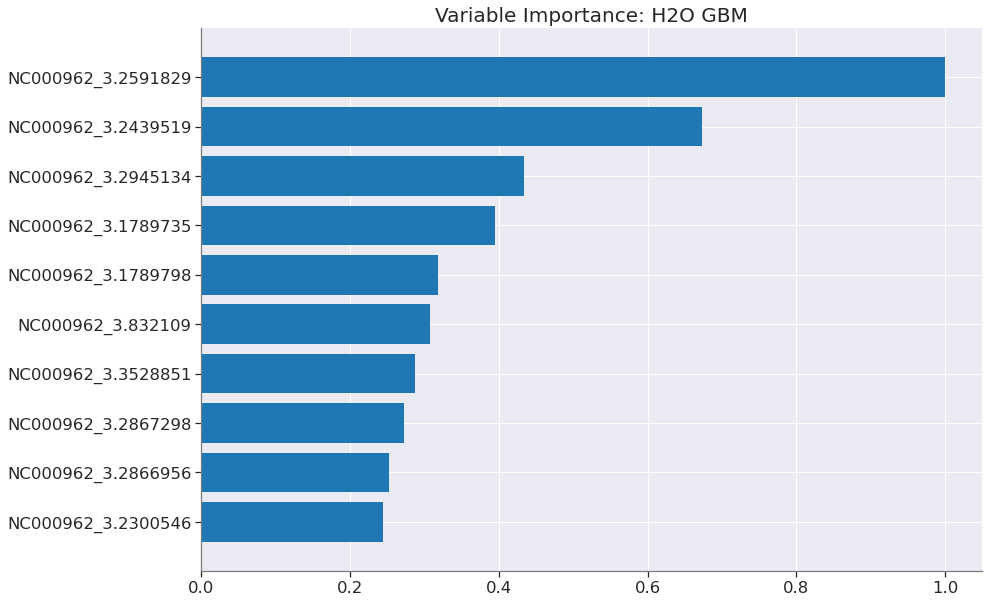

In [49]:
top_gbm.varimp_plot()

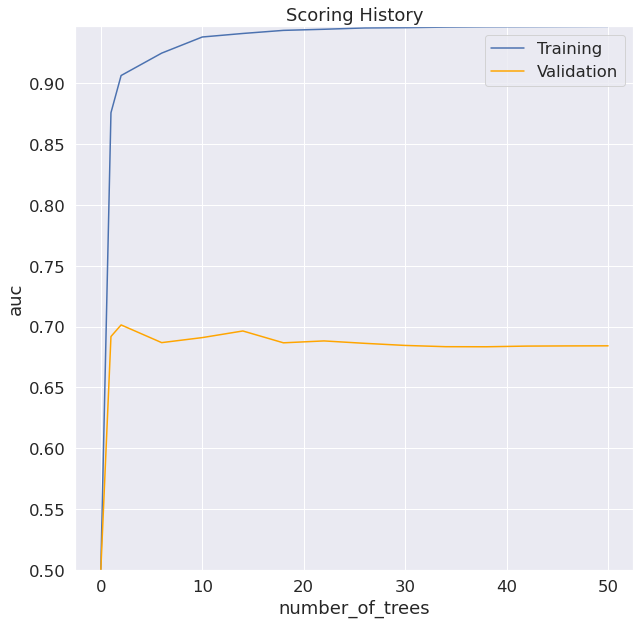

In [92]:
plt.figure(figsize=(10,10))

top_gbm.plot(metric='auc')

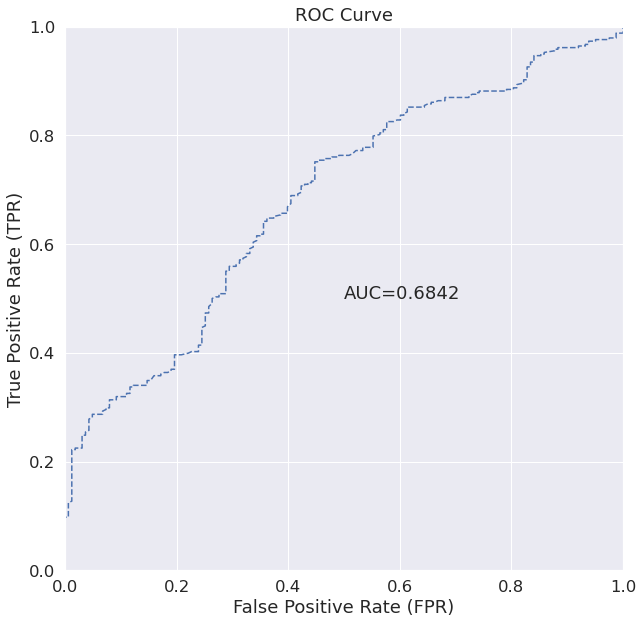

In [95]:
plt.figure(figsize=(10,10))
# plt.title('Gradient Boosting Machine')
top_gbm.model_performance(test).plot()

In [ ]:
top_xgb


In [ ]:
top_dl


In [70]:
top_dl.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_model_python_1604930735703_113',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_model_python_1604930735703_113'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   'is_member_of_frames': N

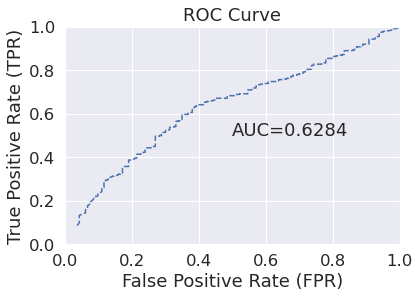

In [85]:
top_dl.model_performance(test).plot()


In [ ]:
top_drf

In [8]:
top_ensemble_ALL_MODELS_MTLNR_auto

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1604937120558_589

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09352990361164965
RMSE: 0.30582659075307633
LogLoss: 0.3440902946312779
Null degrees of freedom: 1222
Residual degrees of freedom: 1217
Null deviance: 1577.310356148988
Residual deviance: 841.6448606681057
AIC: 853.6448606681057
AUC: 0.9797739361702127
AUCPR: 0.9893731412795469
Gini: 0.9595478723404254

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.65870090079126: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 64.12 %


ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1994984719309511
RMSE: 0.44665251810658263
LogLoss: 0.5792089148305252
Null degrees of freedom: 500
Residual degrees of freedom: 495
Null deviance: 633.0394016859412
Residu

,,0,1,Error,Rate
0,0,397.0,26.0,0.0615,(26.0/423.0)
1,1,59.0,741.0,0.0737,(59.0/800.0)
2,Total,456.0,767.0,0.0695,(85.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.658701,0.945756,181.0
1,max f2,0.389687,0.963491,284.0
2,max f0point5,0.685386,0.965173,160.0
3,max accuracy,0.662455,0.930499,178.0
4,max precision,0.850517,1.000000,0.0
5,max recall,0.326661,1.000000,315.0
6,max specificity,0.850517,1.000000,0.0
7,max absolute_mcc,0.662455,0.851333,178.0
8,max min_per_class_accuracy,0.655040,0.927500,183.0
9,max mean_per_class_accuracy,0.680631,0.933941,163.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.848413,1.528750,1.528750,1.000000,0.849017,1.000000,0.849017,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.847694,1.528750,1.528750,1.000000,0.847955,1.000000,0.848507,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.846136,1.528750,1.528750,1.000000,0.846894,1.000000,0.847984,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.845426,1.528750,1.528750,1.000000,0.845702,1.000000,0.847425,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.844344,1.528750,1.528750,1.000000,0.844824,1.000000,0.846880,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.841527,1.528750,1.528750,1.000000,0.842769,1.000000,0.844841,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.839382,1.528750,1.528750,1.000000,0.840477,1.000000,0.843394,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.837356,1.528750,1.528750,1.000000,0.838379,1.000000,0.842146,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.818708,1.516219,1.524584,0.991803,0.830385,0.997275,0.838236,0.15125,0.45750,51.621926,52.458447
9,,10,0.399836,0.794543,1.528750,1.525624,1.000000,0.806837,0.997955,0.830402,0.15250,0.61000,52.875000,52.562372


,,0,1,Error,Rate
0,0,6.0,157.0,0.9632,(157.0/163.0)
1,1,1.0,337.0,0.003,(1.0/338.0)
2,Total,7.0,494.0,0.3154,(158.0/501.0)


,metric,threshold,value,idx
0,max f1,0.280767,0.810096,392.0
1,max f2,0.258199,0.913020,397.0
2,max f0point5,0.731959,0.801012,149.0
3,max accuracy,0.308588,0.686627,384.0
4,max precision,0.849016,1.000000,0.0
5,max recall,0.258199,1.000000,397.0
6,max specificity,0.849016,1.000000,0.0
7,max absolute_mcc,0.763738,0.428010,115.0
8,max min_per_class_accuracy,0.691308,0.656442,199.0
9,max mean_per_class_accuracy,0.763738,0.716584,115.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.844289,1.482249,1.482249,1.000000,0.846175,1.000000,0.846175,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.841633,1.482249,1.482249,1.000000,0.842212,1.000000,0.844374,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,0.840888,1.482249,1.482249,1.000000,0.841120,1.000000,0.843357,0.014793,0.047337,48.224852,48.224852
3,,4,0.041916,0.839998,1.482249,1.482249,1.000000,0.840339,1.000000,0.842638,0.014793,0.062130,48.224852,48.224852
4,,5,0.051896,0.837651,1.482249,1.482249,1.000000,0.838721,1.000000,0.841885,0.014793,0.076923,48.224852,48.224852
5,,6,0.101796,0.822227,1.422959,1.453185,0.960000,0.826103,0.980392,0.834149,0.071006,0.147929,42.295858,45.318482
6,,7,0.151697,0.809477,1.422959,1.443242,0.960000,0.817554,0.973684,0.828690,0.071006,0.218935,42.295858,44.324198
7,,8,0.201597,0.795736,1.482249,1.452897,1.000000,0.801854,0.980198,0.822047,0.073964,0.292899,48.224852,45.289706
8,,9,0.301397,0.778788,1.304379,1.403719,0.880000,0.787895,0.947020,0.810739,0.130178,0.423077,30.437870,40.371880
9,,10,0.401198,0.737226,1.126509,1.334761,0.760000,0.758404,0.900498,0.797720,0.112426,0.535503,12.650888,33.476111


In [5]:
top_ensemble_ALL_MODELS_MTLNR_auto.plot()

No score history for this model


H2OValueError: Plotting not implemented for this type of model

In [6]:
top_ensemble_ALL_MODELS_MTLNR_auto.varimp()

In [10]:
top_ensemble_ALL_MODELS_MTLNR_auto.model_performance(test).confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2807666647472811: 


,,0,1,Error,Rate
0,0,6.0,157.0,0.9632,(157.0/163.0)
1,1,1.0,337.0,0.003,(1.0/338.0)
2,Total,7.0,494.0,0.3154,(158.0/501.0)


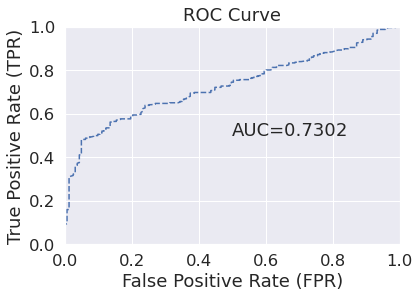

In [84]:
top_ensemble_ALL_MODELS_MTLNR_auto.model_performance(test).plot()

In [72]:
top_ensemble_ALL_MODELS_MTLNR_auto.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_model_python_1604937120558_589',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_model_python_1604937120558_589'}},
 'training_frame': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>'},
    'name': 'NaiveBayes_model_python_1604937120558_113',
    'type': 'Key<Keyed>',
    'URL': None},
   {'__meta': {'schema_version': 3,
     'schema_name': 'KeyV3'

In [7]:
top_ensemble_ALL_MODELS_MTLNR_auto.model_performance(test).auc()

0.7302428576614514

## Models trained on PCA300 Features

In [2]:
train_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/train_pca_df.tsv")

test_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/test_pca_df.tsv")

index_col = 'SampleID'
nfolds = 5

# Identify predictors and response columns
predictor_cols = train_pca_df_frame.columns
response_col = "Resistance_Status"

predictor_cols.remove(response_col)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
# top_dl_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_dl/DeepLearning_model_python_1605278788921_6596")
# top_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_drf/DRF_model_python_1605278788921_5667")

top_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_gbm/GBM_model_python_1605278788921_4757")
top_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_glm/GLM_model_python_1605278788921_4738")
top_nb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_nb/NaiveBayes_model_python_1605278788921_4719")

# top_xgb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_xgb/XGBoost_model_python_1605278788921_5020")


[[1.1973872332114673e-09, 0.6826347305389222]]


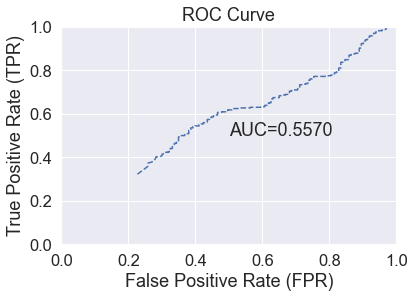

In [52]:
mdl = top_gbm_pca

print(mdl.model_performance(valid=True).accuracy())

mdl.model_performance(valid=True).plot()



In [5]:
top_dl_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_dl/DeepLearning_model_python_1605278788921_6596")
top_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_drf/DRF_model_python_1605278788921_5667")
top_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_gbm/GBM_model_python_1605278788921_4757")
top_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_glm/GLM_model_python_1605278788921_4738")
top_nb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_nb/NaiveBayes_model_python_1605278788921_4719")
top_xgb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_xgb/XGBoost_model_python_1605278788921_5020")

top_ensemble_ALL_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost")

top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost")

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost")


In [6]:
models_trained_on_pca300_features = [
top_dl_pca,
top_drf_pca,
top_gbm_pca, # index 3
top_glm_pca,
top_nb_pca,
top_xgb_pca, # index 5

top_ensemble_ALL_MODELS_METALEARNER_auto_pca,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_ALL_MODELS_METALEARNER_drf_pca, # index 8
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca,
top_ensemble_ALL_MODELS_METALEARNER_glm_pca,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca, # index 11
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca, # index 14
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca, # index 17
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto_pca, # index 20
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca, # index 23
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca, # index 26
]





models_trained_on_pca300_features_list = []
models_trained_on_pca300_features_dict = {}


for a_model in models_trained_on_pca300_features:
    test_performance = a_model.model_performance(valid=True)
    train_performance = a_model.model_performance(train=True)

    metrics_dict = {
        'test': {
            'auc': test_performance.auc(),
            'confusion_matrix': test_performance.confusion_matrix(),
            'accuracy': test_performance.accuracy(),
            'sensitivity': test_performance.sensitivity(),
            'specificity': test_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': test_performance.precision(),
            'recall': test_performance.recall(),
            'fallout': test_performance.fallout(),
            'missrate': test_performance.missrate()
            # 'r2':
        },
        'train': {
            'auc': train_performance.auc(),
            'confusion_matrix': train_performance.confusion_matrix(),
            'accuracy': train_performance.accuracy(),
            'sensitivity': train_performance.sensitivity(),
            'specificity': train_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': train_performance.precision(),
            'recall': train_performance.recall(),
            'fallout': train_performance.fallout(),
            'missrate': train_performance.missrate()
            # 'r2':
        }
    }

    models_trained_on_pca300_features_dict[a_model.model_id] = metrics_dict
    models_trained_on_pca300_features_list.append([a_model.model_id, metrics_dict])

    print('Model ID : ', a_model.model_id)
    print('AUC on test data: ', test_performance.auc(), "\n\n============================")



Model ID :  DeepLearning_model_python_1605278788921_6596
AUC on test data:  0.6271463317239626 

Model ID :  DRF_model_python_1605278788921_5667
AUC on test data:  0.5821051294151813 

Model ID :  GBM_model_python_1605278788921_4757
AUC on test data:  0.5569935020147384 

Model ID :  GLM_model_python_1605278788921_4738
AUC on test data:  0.6266381094130032 

Model ID :  NaiveBayes_model_python_1605278788921_4719
AUC on test data:  0.5736650088938905 

Model ID :  XGBoost_model_python_1605278788921_5020
AUC on test data:  0.6006189421715613 

Model ID :  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto
AUC on test data:  0.6012088430682108 

Model ID :  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
AUC on test data:  0.6200675209641704 

Could not find exact threshold 0.0; using closest threshold found 0.0.
Could not find exact threshold 0.0; using closest threshold found 0.0.
Could not find exact threshold 0.0; using closest threshold found 0.0.
Could

In [114]:
for a_mdl in models_trained_on_pca300_features_list[20:27]:
    print(a_mdl[0])
    print(a_mdl[1]['test']['accuracy'])
    print(a_mdl[1]['test']['auc'])
    print(a_mdl[1]['test']['run_time'])

    print("-----------------------------")

stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto
[[0.36917977483728703, 0.6766467065868264]]
0.661151849566196
419
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
[[0.11575687561468544, 0.6746506986027944]]
0.6485914981667695
2323
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
[[0.020000000000000018, 0.6746506986027944]]
0.6622953497658547
735
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm
[[0.06674979768614445, 0.6806387225548902]]
0.6541184157984535
945
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm
[[0.060685591322269986, 0.6746506986027944]]
0.6533016299415544
203
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes
[[8.832209277123537e-07, 0.6746506986027944]]
0.653710022870004
210
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_M

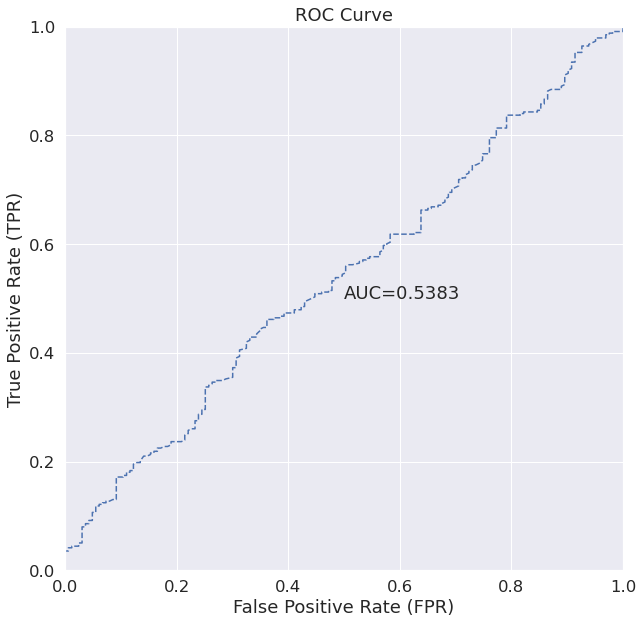

In [104]:
plt.figure(figsize=(10,10))
# plt.title('Gradient Boosting Machine')
top_gbm_pca.model_performance(test_pca_df_frame).plot()

In [20]:
top_nb.model_performance(test_pca_df_frame).plot()

NameError: name 'test_pca_df_frame' is not defined